In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [91]:
df=pd.read_csv("Q:\\vasanth_DL\\Bank_Customer_Churn_dataset.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


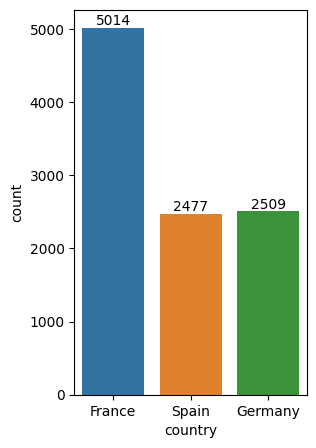

In [92]:
plt.figure(figsize=(3,5))
ax=sb.countplot(data=df,x="country")
for label in ax.containers:
    ax.bar_label(label)

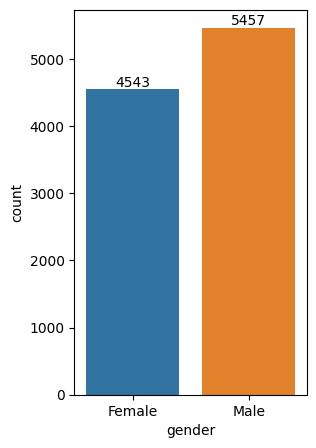

In [93]:
plt.figure(figsize=(3,5))
ax=sb.countplot(data=df,x="gender")
for label in ax.containers:
    ax.bar_label(label)

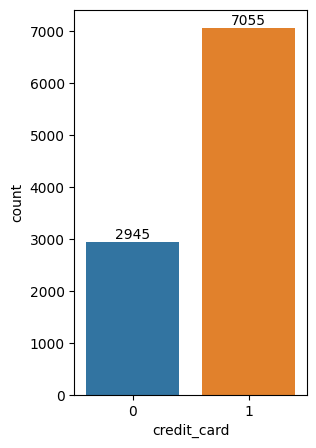

In [94]:
plt.figure(figsize=(3,5))
ax=sb.countplot(data=df,x="credit_card")
for label in ax.containers:
    ax.bar_label(label)

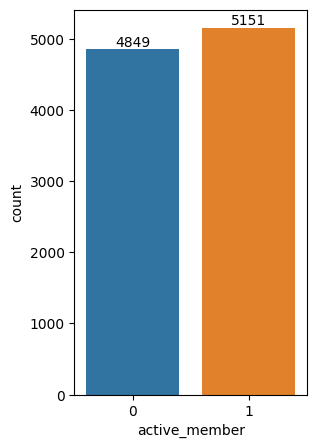

In [95]:
plt.figure(figsize=(3,5))
ax=sb.countplot(data=df,x="active_member")
for label in ax.containers:
    ax.bar_label(label)
    

<Figure size 300x500 with 0 Axes>

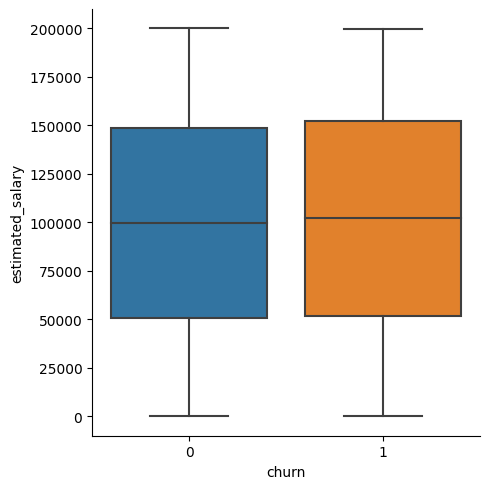

In [96]:
plt.figure(figsize=(3,5))
sb.catplot( data = df,x = 'churn', y="estimated_salary", kind="box")

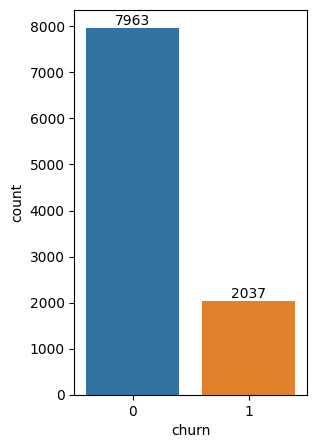

In [97]:
plt.figure(figsize=(3,5))
ax=sb.countplot(data=df,x="churn")
for label in ax.containers:
    ax.bar_label(label)

In [98]:
df.drop("customer_id",axis=1,inplace=True)

In [99]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<Axes: >

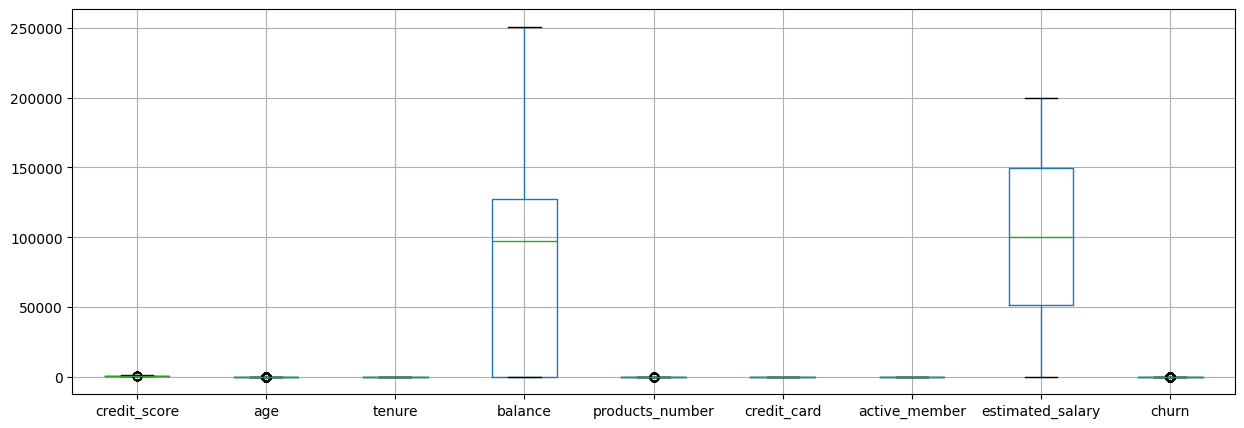

In [101]:
plt.figure(figsize=(15,5))
df.boxplot()                    # no outliers

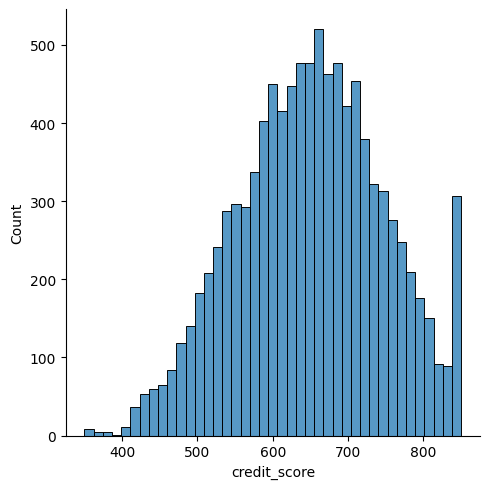

In [102]:
sb.displot(df.credit_score)
# from sklearn.preprocessing import PowerTransformer
# scaler=PowerTransformer(method="yeo-johnson")
# df.credit_score=scaler.fit_transform(df[["credit_score"]])


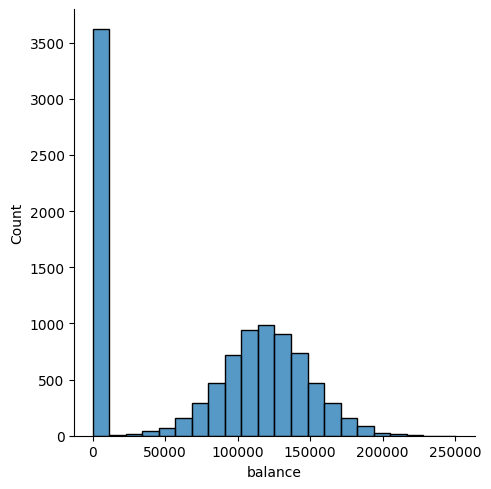

In [103]:
sb.displot(df.balance)

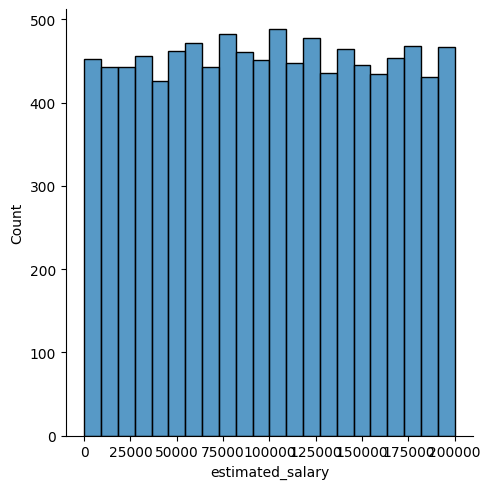

In [104]:
sb.displot(df.estimated_salary)


In [105]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [106]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# df.country=encoder.fit_transform(df.country)

df.country=df.country.map({'France':0, 'Spain':1, 'Germany':2})

In [107]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [108]:
df.gender=df.gender.map({"Female":0,"Male":1})

<Axes: >

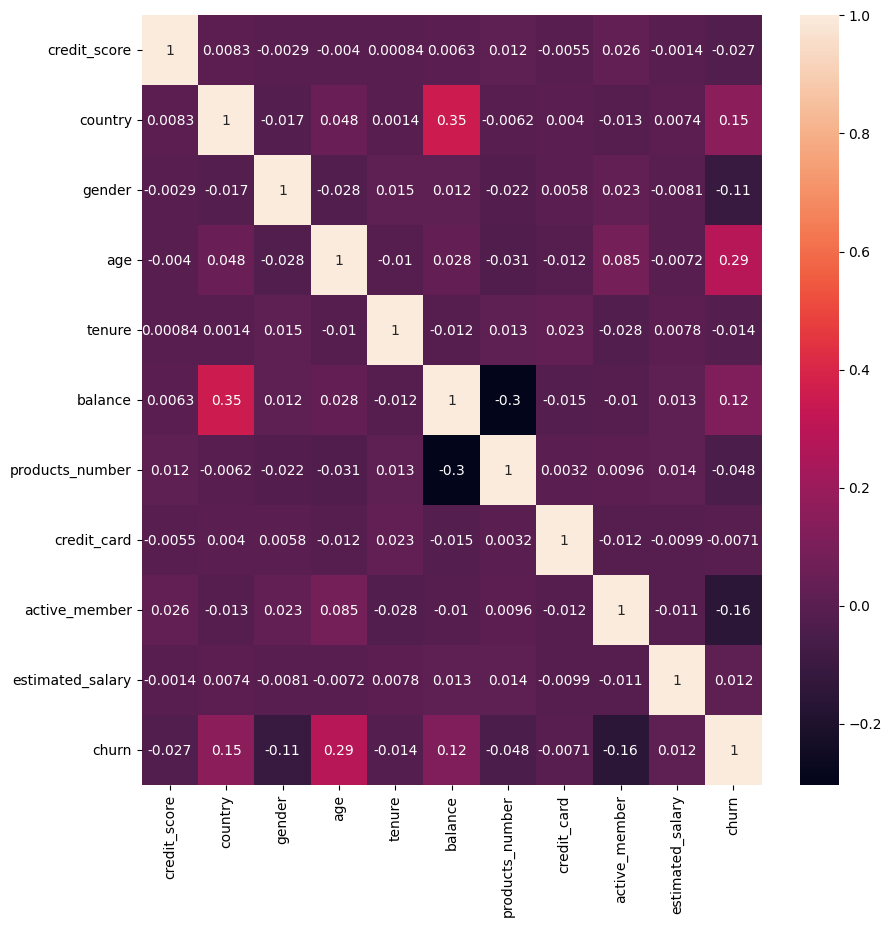

In [109]:
plt.figure(figsize=(10,10))
corr=df.corr()
sb.heatmap(corr,annot=True,fmt=".2g")

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [111]:
y=df.churn
x=df.drop("churn",axis=1)

In [112]:
x.shape,y.shape

((10000, 10), (10000,))

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("trian dataset :",x_train.shape,y_train.shape)
print("test dataset :",x_test.shape,y_test.shape)

trian dataset : (7000, 10) (7000,)
test dataset : (3000, 10) (3000,)


In [114]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)   # this is the only data that hv to train the model
x_test=scaler.transform(x_test)    # this is to use on the trained model (testing)...we do this to avoid data leakage

In [115]:
x.shape

(10000, 10)

In [116]:
# building neural network 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

model=keras.Sequential()

model.add(Dense(10,input_shape=(10,),activation="relu"))            # input layer


model.add(Dense(20,activation="relu"))     # hidden layers--1

model.add(Dropout(0.3))               # dropout layer--reducing the overfitting by deactivating unnecssary neurons

model.add(Dense(10,activation="relu"))    # hidden layers--2

model.add(Dropout(0.3))

   
model.add(Dense(1,activation="sigmoid"))      # output layer


In [117]:
# compiling
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [118]:
# early stopping--stops itirrating if metric doesn't improve

import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",  # quantity to be monitored
    min_delta=0.001,       # min change to qualify as an imporovement
    patience=20,         # n.o of epochs with no improvment after which trianing will be stopped
    verbose=1,         # 0 or 1 disaply message as callback taken (early stop)
    mode="auto",   # "auto", "min", "max"
    baseline=None,      # Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
    restore_best_weights=True, # Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. 
    start_from_epoch=0,           # Number of epochs to wait before starting to monitor improvement.
)

In [119]:
# fitting

model.fit(x_train,y_train,epochs=100,batch_size=10,callbacks=early_stopping,validation_split=0.3)


Epoch 1/100
490/490 [==============================] - 1s 990us/step - loss: 0.5318 - accuracy: 0.7712 - val_loss: 0.4599 - val_accuracy: 0.7948
Epoch 2/100
490/490 [==============================] - 0s 855us/step - loss: 0.4733 - accuracy: 0.7904 - val_loss: 0.4315 - val_accuracy: 0.8019
Epoch 3/100
490/490 [==============================] - 0s 949us/step - loss: 0.4434 - accuracy: 0.8045 - val_loss: 0.4170 - val_accuracy: 0.8224
Epoch 4/100
490/490 [==============================] - 0s 937us/step - loss: 0.4261 - accuracy: 0.8080 - val_loss: 0.4074 - val_accuracy: 0.8319
Epoch 5/100
490/490 [==============================] - 0s 966us/step - loss: 0.4113 - accuracy: 0.8222 - val_loss: 0.3993 - val_accuracy: 0.8333
Epoch 6/100
490/490 [==============================] - 1s 1ms/step - loss: 0.4008 - accuracy: 0.8267 - val_loss: 0.3914 - val_accuracy: 0.8329
Epoch 7/100
490/490 [==============================] - 0s 920us/step - loss: 0.3962 - accuracy: 0.8316 - val_loss: 0.3861 - val_accu

In [120]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

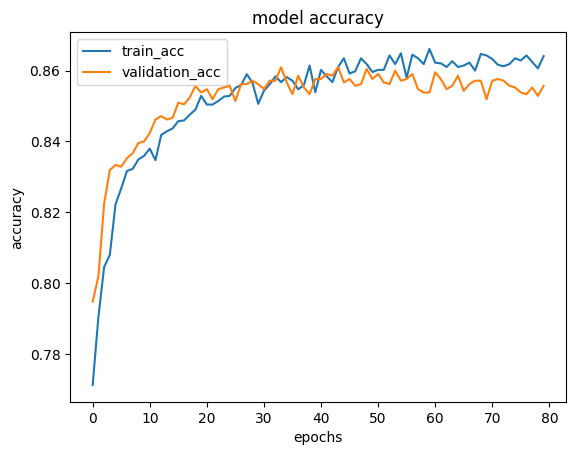

In [121]:
plt.plot(model.history.history["accuracy"])           # plotting accuracy 
plt.plot(model.history.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train_acc","validation_acc"])

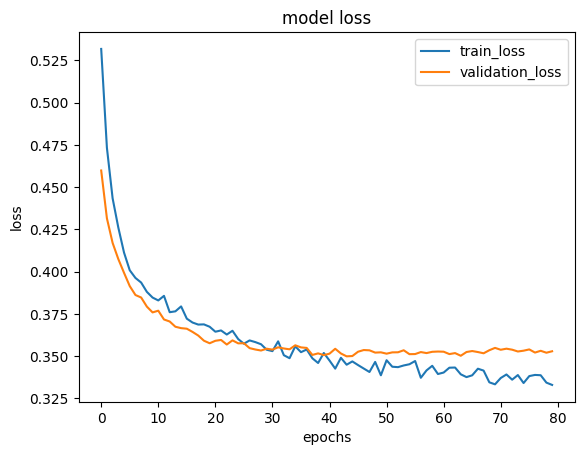

In [122]:
plt.plot(model.history.history["loss"])           # plotting loss 
plt.plot(model.history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("model loss")
plt.legend(["train_loss","validation_loss"])

In [123]:
model.evaluate(x_test,y_test)     # evaluating--->[loss,accuracy]

94/94 [==============================] - 0s 551us/step - loss: 0.3386 - accuracy: 0.8613


[0.33860957622528076, 0.8613333106040955]

In [124]:
# predicting--> churn--- log probability of 0 or 1
y_pred=model.predict(x_test)
y_pred

94/94 [==============================] - 0s 467us/step


array([[0.0326633 ],
       [0.01851138],
       [0.1480811 ],
       ...,
       [0.04744081],
       [0.01017133],
       [0.20208405]], dtype=float32)

In [125]:
# unscaling --- y_pred to 0 or 1

y_pred_list=[]
for i in y_pred:
    if i>0.5:
        y_pred_list.append(1)
    else:
        y_pred_list.append(0)

print(y_pred_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 

In [126]:
prediction_df=pd.DataFrame({"Actual":y_test,"predicted":y_pred_list})
prediction_df

,Actual,predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
...,...,...
8014,0,0
1074,0,0
3063,0,0
6487,0,0


In [127]:
prediction_df.Actual.unique()

array([0, 1], dtype=int64)

In [128]:
prediction_df.predicted.unique()

array([0, 1], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

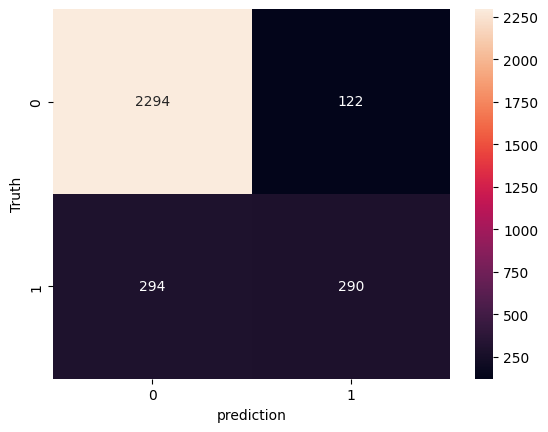

In [129]:
from sklearn.metrics import classification_report,confusion_matrix
cm=tf.math.confusion_matrix(labels=prediction_df.Actual,predictions=prediction_df.predicted)
sb.heatmap(cm,annot=True,fmt="d")
plt.xlabel("prediction")
plt.ylabel("Truth")

In [130]:
print(cm)

tf.Tensor(
[[2294  122]
 [ 294  290]], shape=(2, 2), dtype=int32)


In [131]:
print(classification_report(prediction_df.Actual,prediction_df.predicted))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2416
           1       0.70      0.50      0.58       584

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [132]:
from sklearn.metrics import accuracy_score
score=accuracy_score(prediction_df.Actual,prediction_df.predicted)
print("model accuracy: ",score)

model accuracy:  0.8613333333333333
